### Simulate some data

In [1]:
import sys
sys.path.append("..")
from nodegamlss.sklearn import NodeGAMLSS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Generate dataset
N = 5000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3) + np.random.normal(0,0.5, N)
y = (y - np.mean(y)) / np.std(y)
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)



WARNING! The apex is not installed so fp16 is not available.


#### Visualize simulated data

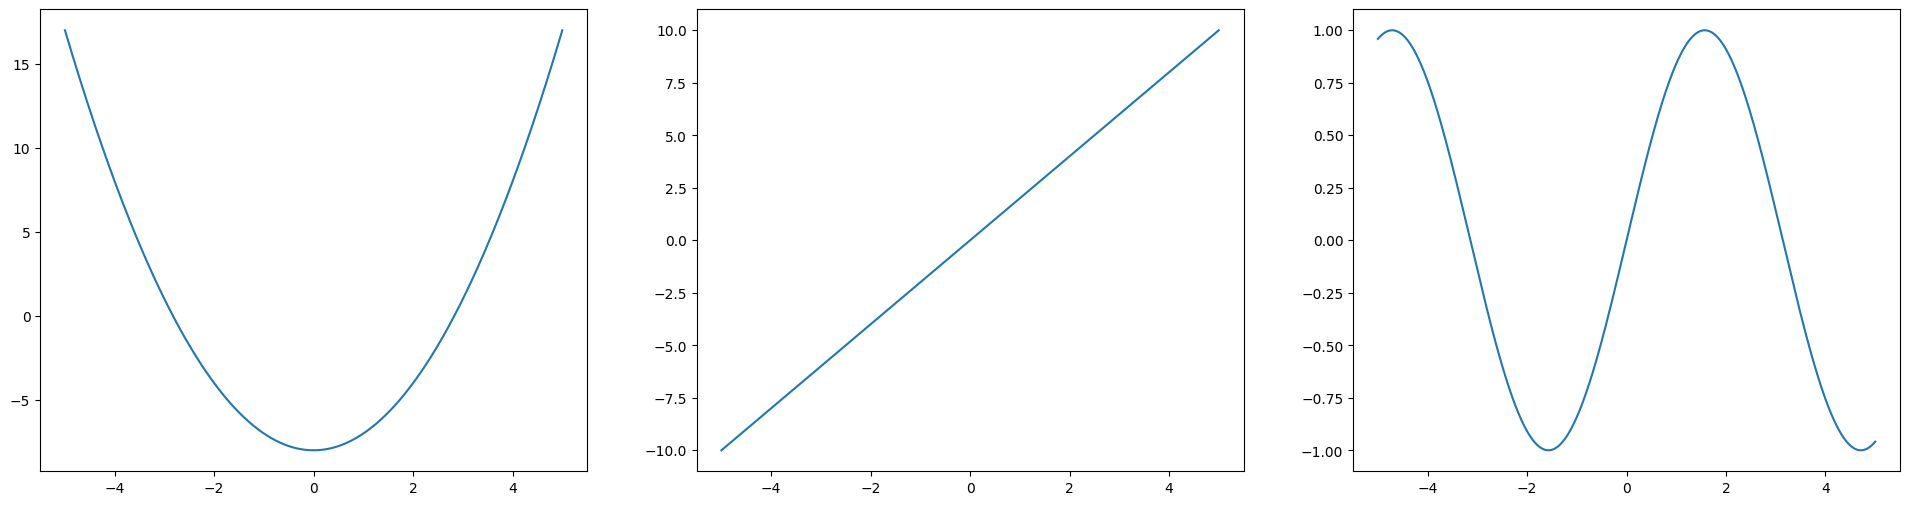

In [2]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## Fit NodeGAMLSS
Use Normal distribution, minimize neg-log-lik

In [3]:
model = NodeGAMLSS(
    in_features=X.shape[1],
    family="normal",
    device="cpu",
    verbose=False,
    max_steps=5000,
    lr=0.001,
    report_frequency=100,
    num_trees=75,
)


record = model.fit(X, y)

c:\Users\anton\anaconda3\envs\nodegam_venv\lib\site-packages\qhoptim\pyt\qhadam.py:133: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:1630.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Steps	Train Err	Val Metric (LSS)
100	1.6613	1.7065
200	1.486	1.6053
300	1.3467	1.5312
400	1.4044	1.4572
500	1.436	1.4079
600	1.4243	1.3901
700	1.2152	1.2341
800	1.4704	1.1278
900	1.2988	1.0891
1000	0.6904	0.9995
1100	0.2237	0.7267
1200	0.3738	0.5643
1300	-0.0337	0.2733
1400	-0.1175	0.0867
1500	0.4633	-0.013
1600	-0.0846	-0.0574
1700	0.1157	-0.1274
1800	0.0245	-0.1065
1900	0.4007	-0.1157
2000	0.1643	-0.125
2100	0.0421	-0.3183
2200	-0.1772	-0.3291
2300	-0.0508	-0.3405
2400	0.3195	-0.4016
2500	0.3034	-0.4743
2600	-0.5011	-0.5206
2700	-0.2589	-0.5686
2800	-0.4134	-0.6162
2900	-0.2347	-0.6593
3000	-0.5495	-0.6772
3100	-0.5887	-0.6936
3200	-0.5908	-0.6955
3300	-0.5708	-0.7253
3400	-0.2929	-0.7325
3500	-0.2236	-0.7657
3600	-0.1091	-0.7742
3700	-0.5184	-0.818
3800	0.0441	-0.8296
3900	-0.5452	-0.8525
4000	-0.6516	-0.8712
4100	-0.4777	-0.8808
4200	-0.4295	-0.8847
4300	-0.8032	-0.8943
4400	-0.195	-0.8797
4500	-0.732	-0.8685
4600	-0.8373	-0.874
LR: 1.00e-03 -> 2.00e-04
4700	-0.7402	-0.8796
4800	-0

# Visualize
 plots are shown in order of distributional parameters as defined by the distribution in torch.distributions. 
 First row thus shows mean, second shows variance (before softplus transformation)

bin features 0 with uniq val 4999 to only 256
bin features 1 with uniq val 5000 to only 256
bin features 2 with uniq val 5000 to only 256
Finish "Run values through model" in 88ms


100%|██████████| 6/6 [00:00<00:00, 348.60it/s]


Finish "Extract values" in 21ms
Finish "Purify interactions to main effects" in 29ms
Finish "Center main effects" in 0ms


100%|██████████| 7/7 [00:00<00:00, 27.44it/s]


Finish "Construct table" in 267ms
Finish "Run values through model" in 89ms


100%|██████████| 6/6 [00:00<00:00, 307.34it/s]


Finish "Extract values" in 20ms
Finish "Purify interactions to main effects" in 24ms
Finish "Center main effects" in 0ms


100%|██████████| 7/7 [00:00<00:00, 28.15it/s]


Finish "Construct table" in 249ms


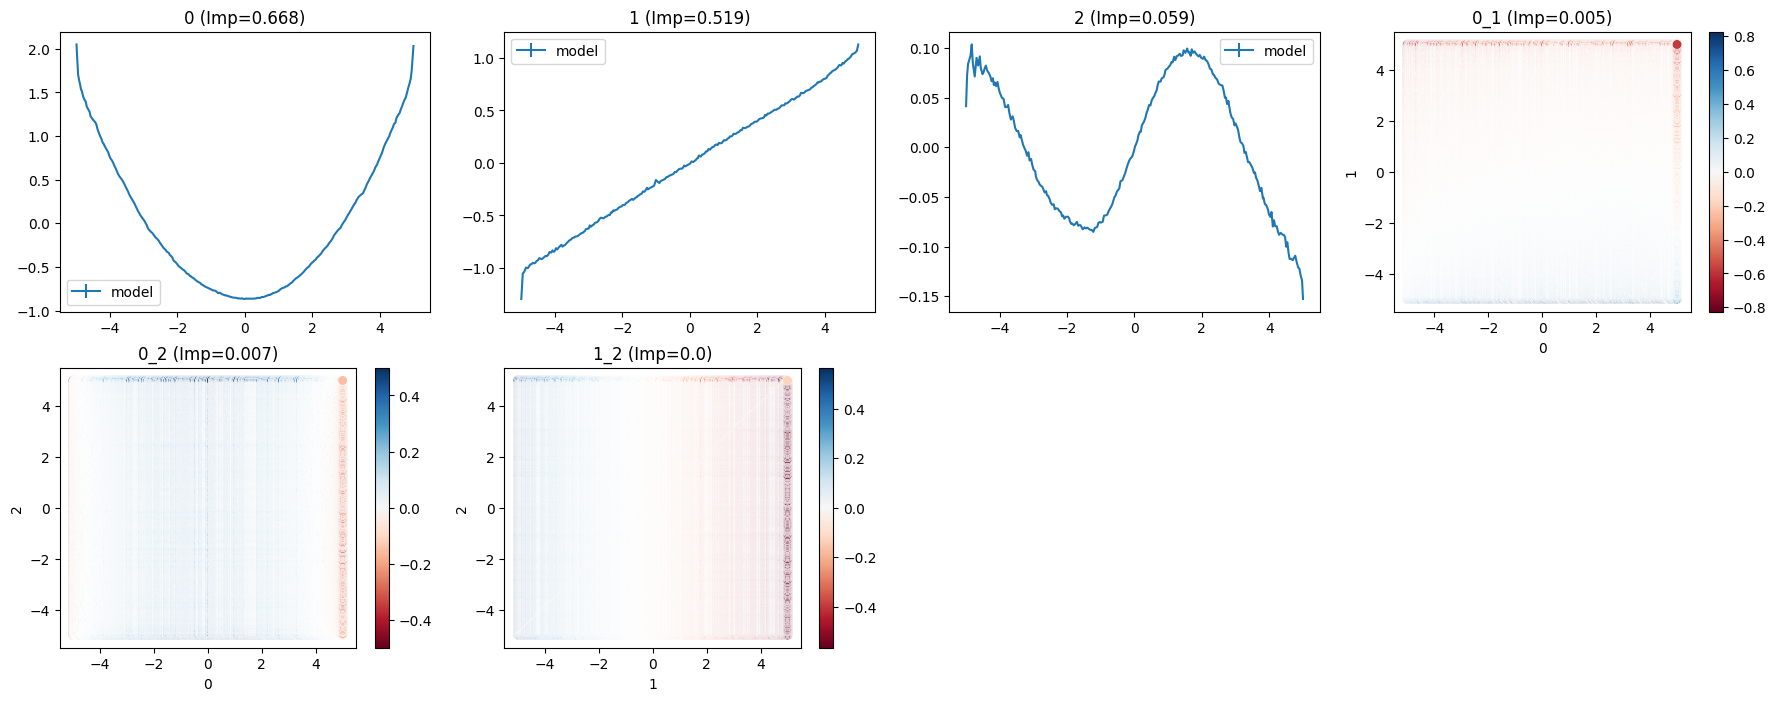

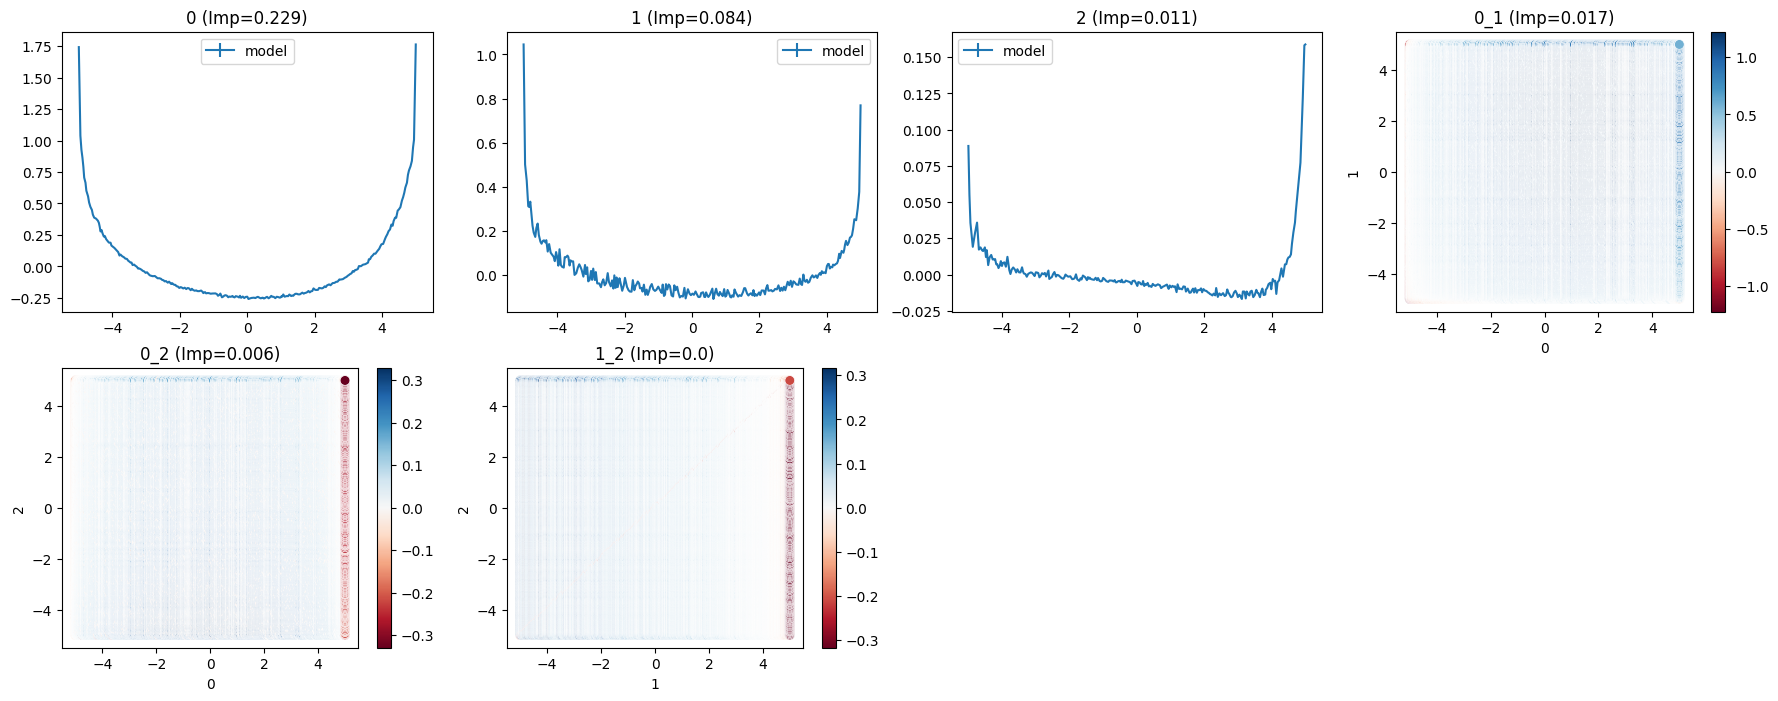

In [5]:
fig, axes, df = model.visualize(X)

## Visualize training loss

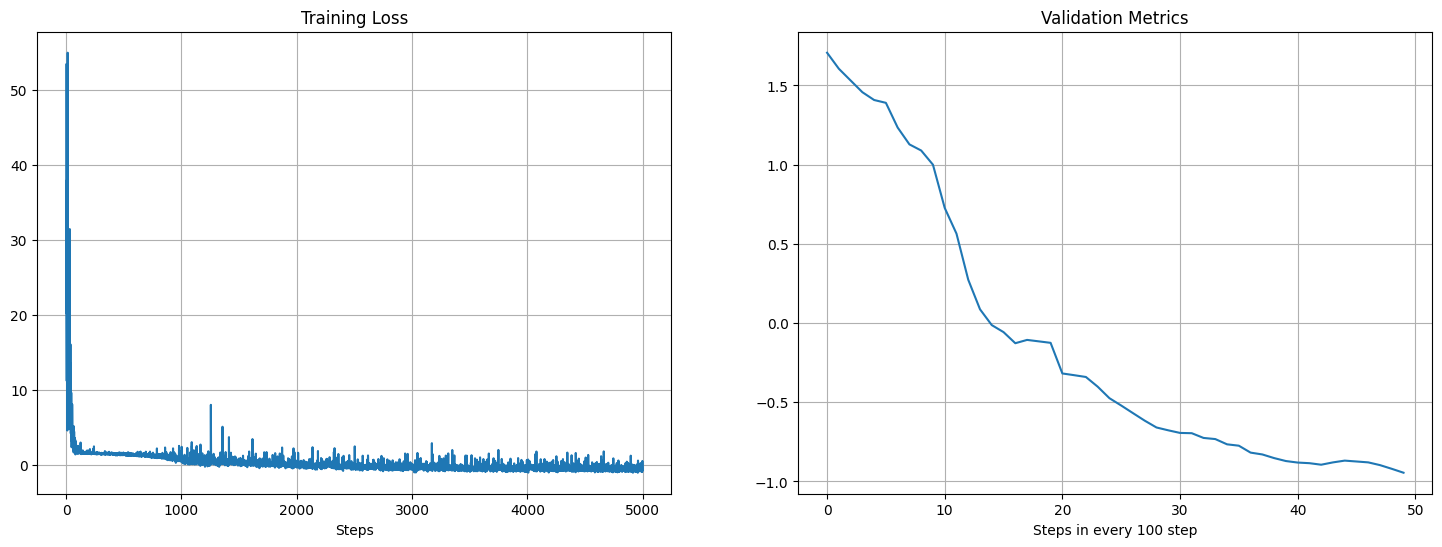

In [4]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

#### Fit model with MSE as evaluation metrics

In [ ]:
model = NodeGAMLSS(
    in_features=3,
    objective="mse",
    family="poisson",
    device="cpu",
    verbose=False,
    max_steps=200,
    lr=0.0001,
    num_trees=50,
    problem="regression"
)


record = model.fit(X, y)

Normalize y. mean = 0.010832696187952153, std = 0.3459724514713714


c:\Users\anton\Desktop\Projects\NodeGAMLSS\notebooks\..\nodegamlss\trainer.py:120: UserWarning: Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([2048, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.loss_function = lambda y1, y2: F.mse_loss(y1.float(), y2.float())
c:\Users\anton\Desktop\Projects\NodeGAMLSS\notebooks\..\nodegamlss\trainer.py:120: UserWarning: Using a target size (torch.Size([154])) that is different to the input size (torch.Size([154, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.loss_function = lambda y1, y2: F.mse_loss(y1.float(), y2.float())


Steps	Train Err	Val Metric (mse)
20	3.6422	0.2501
40	1.0102	0.2473
60	2.1354	0.2431
80	1.4882	0.2379
100	1.8331	0.2298
120	1.313	0.2183
140	2.0864	0.2074
160	1.3049	0.1968
180	3.3573	0.1874
200	1.1318	0.1794
End. It reaches the maximum steps 200
Total training time: 11.7 seconds
Best step:  200
Best Val Metric:  0.179387947495861
Load the best checkpoint.


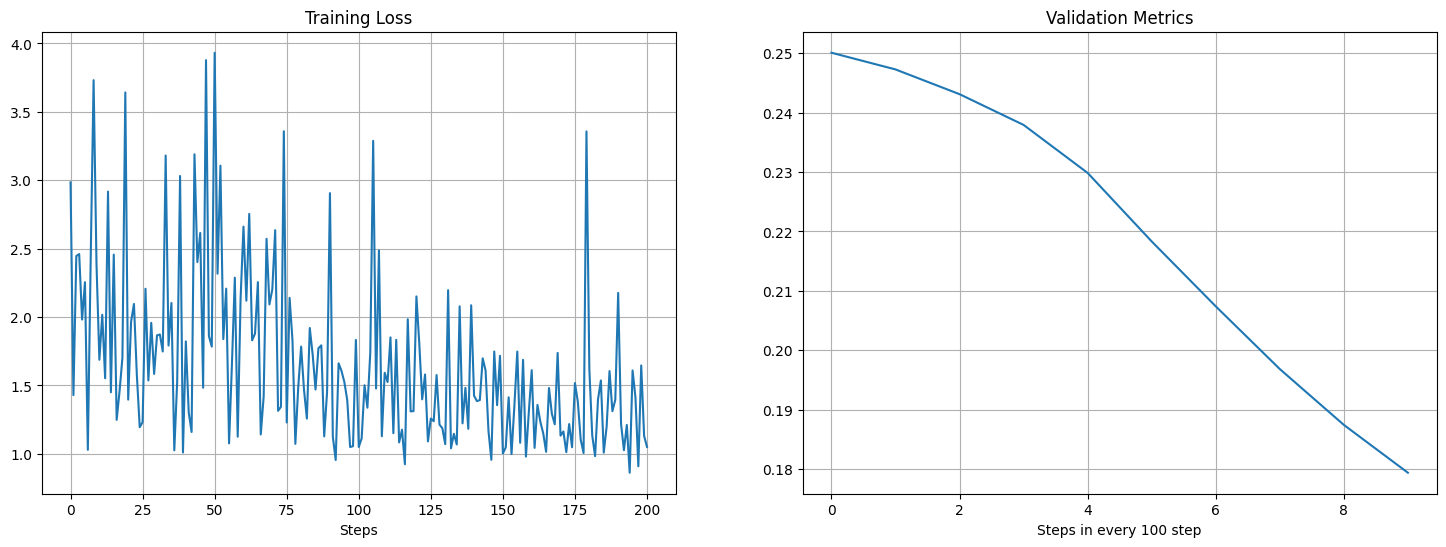

In [ ]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

bin features 0 with uniq val 5000 to only 256
bin features 1 with uniq val 5000 to only 256
bin features 2 with uniq val 4999 to only 256
Finish "Run values through model" in 61ms


100%|██████████| 6/6 [00:00<00:00, 275.15it/s]


Finish "Extract values" in 24ms
Finish "Purify interactions to main effects" in 24ms
Finish "Center main effects" in 0ms


100%|██████████| 7/7 [00:00<00:00, 38.88it/s]


Finish "Construct table" in 184ms


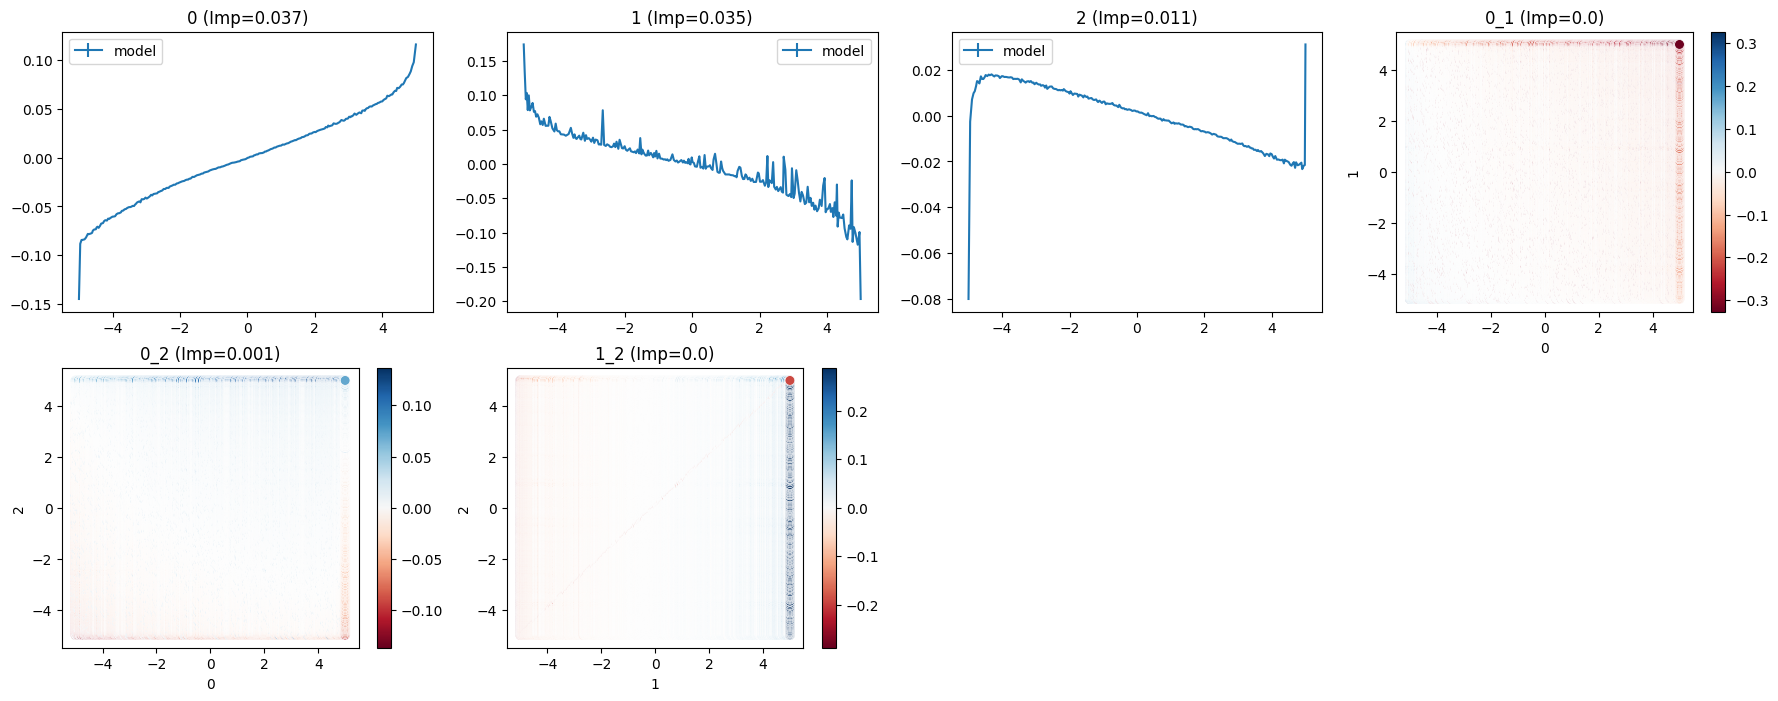

In [ ]:
fig, axes, df = model.visualize(X)